## Unballanced dataset Preprocessing

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('datasets/data2_balanced_raw.csv')

In [6]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.100000,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.370000,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.540000,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.440000,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.970000,0


In [7]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000
mean,284314.500000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,12041.957635,0.500000
std,164149.486121,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,6919.644449,0.500000
min,0.000000,-3.495584,-49.966572,-3.183760,-4.951222,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919,-3.163276,-5.954723,-2.020399,-5.955227,-2.107417,-3.861813,-2.214513,-2.484938,-2.421949,-7.804988,-78.147839,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-8.226969,-10.498633,-39.035243,50.010000,0.000000
25%,142157.250000,-0.565286,-0.486678,-0.649299,-0.656020,-0.293496,-0.445871,-0.283533,-0.192257,-0.568745,-0.590101,-0.701449,-0.831133,-0.696667,-0.873206,-0.621249,-0.716265,-0.619491,-0.556046,-0.565308,-0.350240,-0.166441,-0.490489,-0.237629,-0.651580,-0.554148,-0.631895,-0.304961,-0.231878,6054.892500,0.000000
50%,284314.500000,-0.093638,-0.135894,0.000353,-0.073762,0.081088,0.078718,0.233366,-0.114524,0.092526,0.262614,-0.041050,0.162052,0.017608,0.230501,-0.039256,0.134026,0.271641,0.087294,-0.025979,-0.123378,-0.037431,-0.027329,-0.059689,0.015901,-0.008193,-0.011892,-0.172911,-0.013930,12030.150000,0.500000
75%,426471.750000,0.832658,0.343555,0.628538,0.707005,0.439737,0.497788,0.525955,0.047299,0.559262,0.592460,0.747773,0.744672,0.685605,0.751822,0.665406,0.655606,0.518224,0.544389,0.560116,0.248216,0.147979,0.463882,0.155715,0.700737,0.550015,0.672888,0.334023,0.409590,18036.330000,1.000000
max,568629.000000,2.229046,4.361865,14.125834,3.201536,42.716891,26.168402,217.873038,5.958040,20.270062,31.722709,2.513573,17.913556,7.187486,19.169544,14.532202,46.652906,6.994124,6.783716,3.831672,29.872812,8.087080,12.632511,31.707627,12.965639,14.621509,5.623285,113.231093,77.255937,24039.930000,1.000000


In [8]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values()
total

id        0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V16       0
Amount    0
V15       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V1        0
V14       0
Class     0
dtype: int64

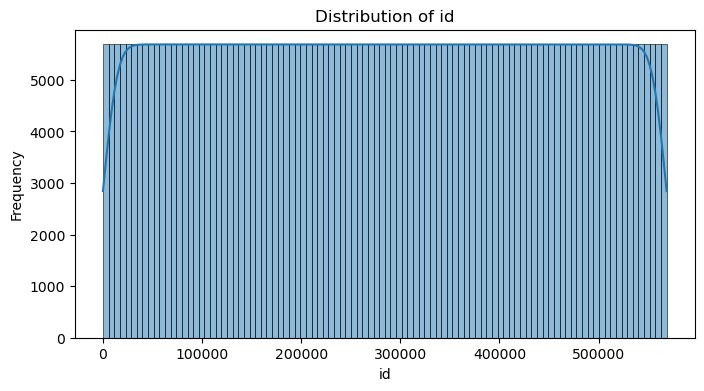

In [18]:
# Distribution of Time
plt.figure(figsize=(8, 4))
sns.histplot(df['id'], bins=100, kde=True)
plt.title('Distribution of id')
plt.xlabel('id')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Dropping id column as it seems to be database identifier, for each record incremental increase by 1.
df.drop(['id'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.100000,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.370000,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.540000,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.440000,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.970000,0


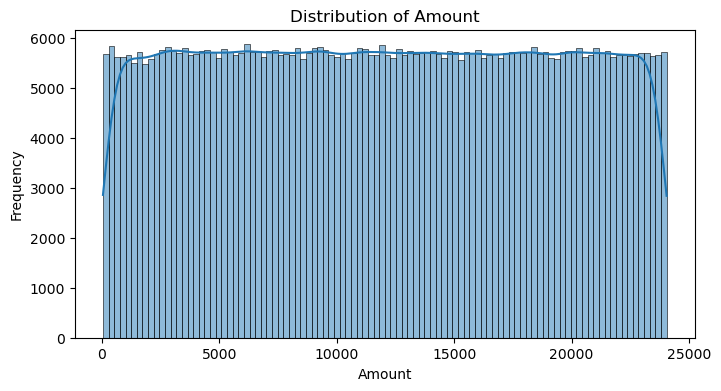

In [10]:
# Distribution of Time
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

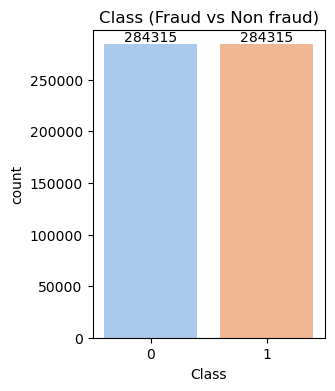

In [11]:
plt.figure(figsize=(3,4))
plt.title('Class (Fraud vs Non fraud)')
ax = sns.countplot(x='Class',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

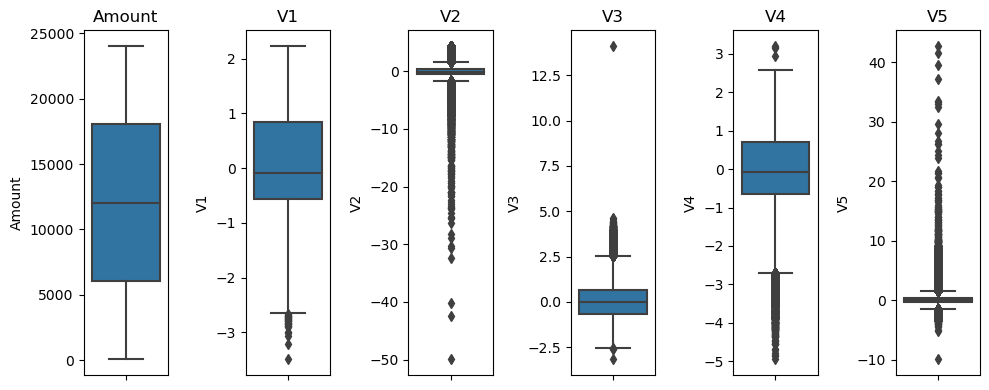

In [12]:
# Box plots
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Amount','V1','V2','V3','V4','V5']
n_cols = len(columns_to_plot)

fig, axes = plt.subplots(1, n_cols, figsize=(10, 4), sharey=False)

for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col.capitalize()}')

plt.tight_layout()
plt.show()

### Amount is very equally distributed and symetrical. Variables seem to have different discributions

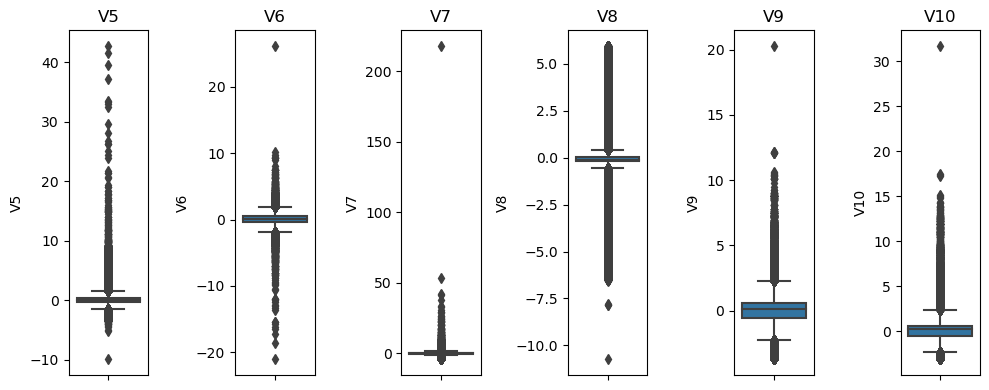

In [13]:
# Box plots
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['V5','V6','V7','V8','V9','V10',]
n_cols = len(columns_to_plot)

fig, axes = plt.subplots(1, n_cols, figsize=(10, 4), sharey=False)

for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col.capitalize()}')

plt.tight_layout()
plt.show()

### Variables seem to have different discributions. All centered around 0, but having skeweness either to positive or negative side.


## Outlier handling

In [14]:
# Handling outliers
column_list = (list(df.columns))
# Remove specific columns
columns_to_remove = ['Amount', 'Class']
column_list = [item for item in column_list if item not in columns_to_remove]

column_list

def detect_and_handle_outliers(df, column):
    Q1 = df[column].quantile(0.01)
    Q3 = df[column].quantile(0.99)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column] < lower_fence) | (df[column] > upper_fence)]
    print(f"Number of outliers in {column}: {len(outliers)}")

    # Cap and floor values
    df[column] = df[column].clip(lower=lower_fence, upper=upper_fence)

    return df

# Outliers are capped and floored
for col in column_list:
    df = detect_and_handle_outliers(df, col)

Number of outliers in id: 0
Number of outliers in V1: 0
Number of outliers in V2: 157
Number of outliers in V3: 1
Number of outliers in V4: 0
Number of outliers in V5: 92
Number of outliers in V6: 17
Number of outliers in V7: 134
Number of outliers in V8: 0
Number of outliers in V9: 13
Number of outliers in V10: 327
Number of outliers in V11: 0
Number of outliers in V12: 2
Number of outliers in V13: 0
Number of outliers in V14: 40
Number of outliers in V15: 1
Number of outliers in V16: 7
Number of outliers in V17: 0
Number of outliers in V18: 0
Number of outliers in V19: 0
Number of outliers in V20: 156
Number of outliers in V21: 1
Number of outliers in V22: 1
Number of outliers in V23: 622
Number of outliers in V24: 52
Number of outliers in V25: 4
Number of outliers in V26: 0
Number of outliers in V27: 19
Number of outliers in V28: 144


In [15]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)
print("==============================================")

imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

 Normal_share= 50.0 
 Fraud_share= 50.0
 Imbalance Percentage = 100.0


In [16]:
# Creating sub dataframes

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

fraud_df.head()

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=2)

new_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
509499,509499,-0.155525,0.125490,-0.463312,-0.513610,0.244778,-0.507504,0.078829,-0.064200,-0.734859,-0.305170,0.070710,-0.445145,1.091394,-0.726209,-0.648555,-0.734209,-0.193924,0.234167,-0.853980,-0.366342,-0.052060,-0.460199,-0.347469,0.537283,0.901781,1.507912,-0.339828,0.120751,17236.360000,1
400952,400952,0.274709,0.310506,-0.377331,0.897009,0.263569,-0.090538,-0.074004,-0.353451,-0.890270,-0.211855,0.478902,-0.573979,-0.343698,-0.676503,0.044574,-0.354202,-0.309274,-0.134209,0.072252,0.564166,-0.163939,0.162370,-0.286272,-0.525392,1.213747,0.899822,0.535187,0.978675,18439.290000,1
383729,383729,-1.125508,0.630653,-1.125436,1.148732,-0.739501,-1.176308,-0.930722,0.777612,-1.394877,-1.223789,1.484800,-1.274509,0.868087,-1.420244,-0.390501,-1.105186,-1.291667,-1.003959,0.693711,0.311189,0.329988,-0.331984,-0.018116,-0.668108,0.299858,1.827051,1.151710,-0.874660,13808.120000,1
501934,501934,-0.535852,0.291982,-0.727899,0.068332,-0.278143,-0.951692,-0.298654,-0.053542,-0.108972,-0.631468,0.564559,-0.832033,-0.551496,-0.989540,1.046559,-0.721990,-0.701986,-0.653115,0.110021,-0.393205,0.254643,-0.431218,0.165081,0.471179,-0.014063,0.049802,-0.878798,1.885951,22954.200000,1
564193,564193,0.297827,0.006806,-0.180662,0.416524,-0.237405,-0.269416,-0.254669,0.025716,-0.289717,-0.356942,0.835300,-0.681599,-2.112475,-0.598671,0.509224,-0.540940,-0.674747,-0.342269,-0.215162,0.102240,0.145050,0.147676,-0.187818,0.444930,1.068538,-0.167751,0.591043,0.697035,10409.690000,1


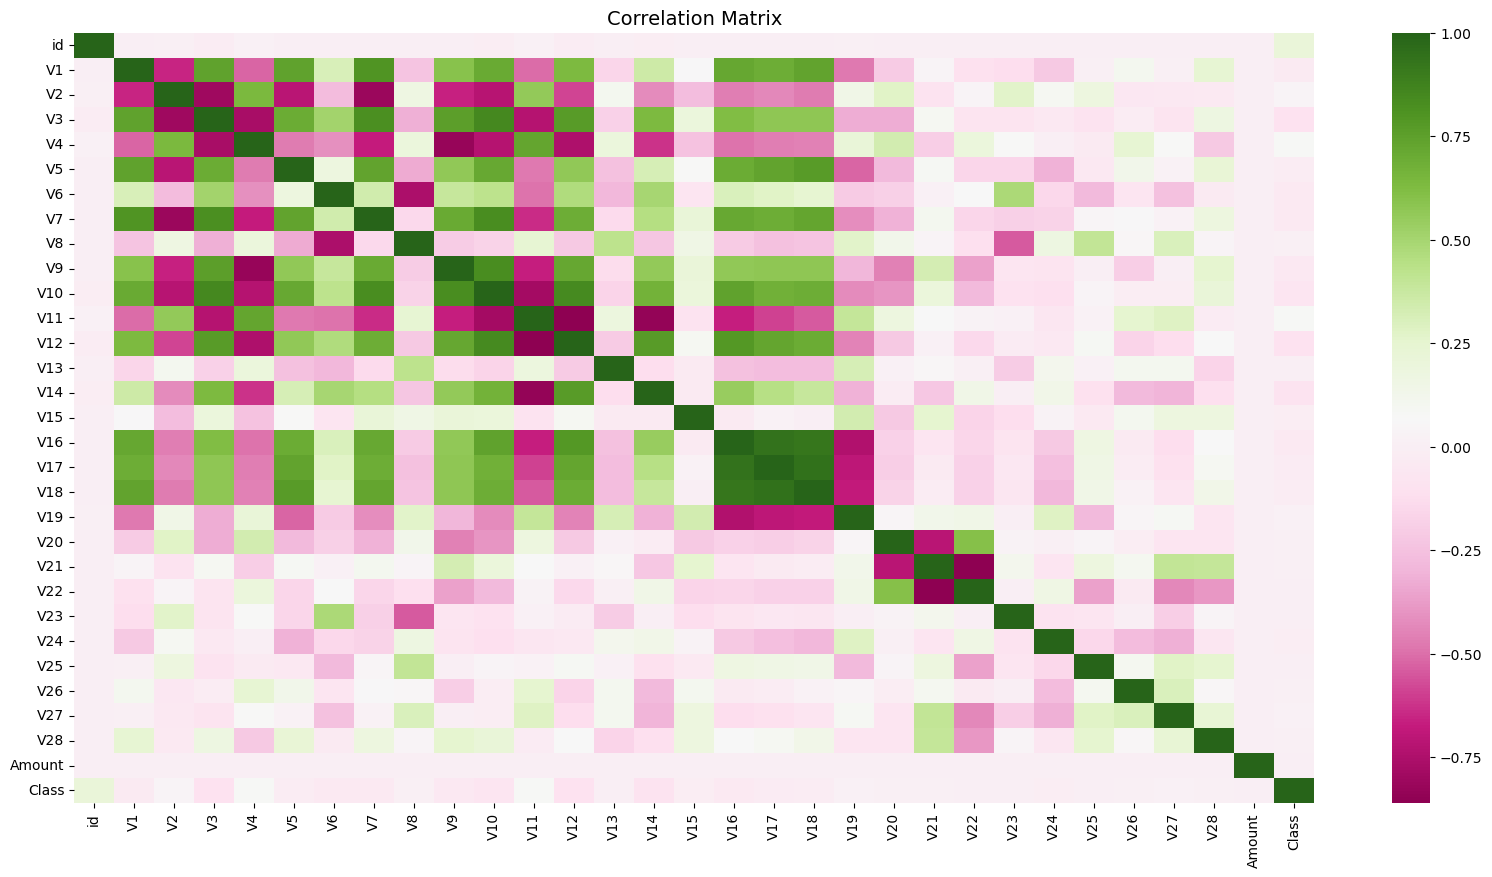

In [17]:
# Correlation matrix

f, ax2 = plt.subplots(1, 1, figsize=(20, 10))

sub_sample_corr = new_df.corr()

sns.heatmap(sub_sample_corr, cmap='PiYG', annot_kws={'size': 18}, ax=ax2)

ax2.set_title('Correlation Matrix', fontsize=14)

plt.show()

### There don't seem to be many variables correlated with Class. But there are also quite a few variables which are correlated between each other. 

## Scaling Amount and Time similarily as all other already scaled variables

In [20]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['s_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
#df['s_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount'], axis=1, inplace=True)

scaled_amount = df['s_amount']
#scaled_time = df['s_time']

df.drop(['s_amount'], axis=1, inplace=True)
df.insert(0, 's_amount', scaled_amount)
#df.insert(1, 's_time', scaled_time)


df.head()

,s_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.496764,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0
1,-0.458942,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0
2,-0.794279,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0
3,-0.554667,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0
4,0.187692,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0


## Exporting preprocessed dataset

In [21]:
df.to_csv('datasets/data2_balanced.csv', index=False)